In [1]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

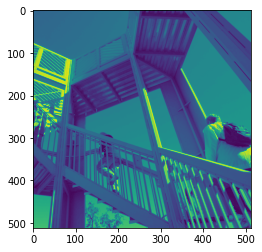

In [2]:
import matplotlib.pyplot as plt
plt.imshow(i)

In [6]:
# Copy image
i_new = np.copy(i)
size_x = i_new.shape[0]
size_y = i_new.shape[1]

In [7]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

In [8]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x-1, y-1] * filter[0][0])
      convolution = convolution + (i[x-1, y] * filter[0][1])  
      convolution = convolution + (i[x-1, y+1] * filter[0][2])     
      convolution = convolution + (i[x, y-1] * filter[1][0])    
      convolution = convolution + (i[x, y] * filter[1][1])    
      convolution = convolution + (i[x, y+1] * filter[1][2])    
      convolution = convolution + (i[x+1, y-1] * filter[2][0])    
      convolution = convolution + (i[x+1, y] * filter[2][1])    
      convolution = convolution + (i[x+1, y+1] * filter[2][2])    
      convolution = convolution * weight   
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_new[x, y] = convolution


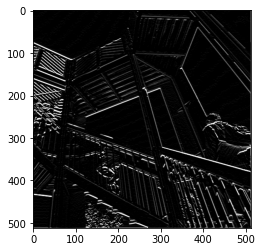

In [10]:
# Now we can plot the image to see the effect of the convolution!
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_new)
#plt.axis('off')
plt.show()


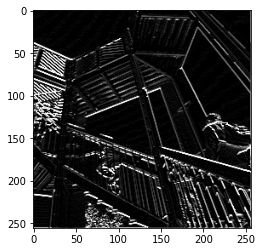

In [11]:
# This code will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_new[x, y])
    pixels.append(i_new[x+1, y])
    pixels.append(i_new[x, y+1])
    pixels.append(i_new[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()